In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
dataset.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992,12,13,-4.99,156.0,4.8,-2.8,78.5,28.98,30.06
1,1989,5,14,0.00,-110.1,-2.5,2.4,NaN,24.95,25.23
2,1993,6,28,2.04,-110.2,-4.5,5.9,NaN,25.78,27.84
3,1995,1,8,1.98,-140.0,-7.7,1.2,82.6,26.47,26.86
4,1995,2,21,5.01,-170.0,-5.4,-6.6,75.2,28.83,28.90


In [4]:
dataset['humidity'].interpolate(inplace=True)

In [5]:
dataset['zon.winds'].fillna(np.random.normal(dataset['zon.winds'].mean(),dataset['zon.winds'].std()),inplace=True)
dataset['mer.winds'].fillna(np.random.normal(dataset['mer.winds'].mean(),dataset['mer.winds'].std()),inplace=True)

In [6]:
dataset['humidity']=dataset['humidity'].fillna(dataset['humidity'].mean(),)
data=dataset

In [7]:
data=data.dropna(subset=['air temp.'])

In [8]:
data.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992,12,13,-4.99,156.0,4.8,-2.8,78.500000,28.98,30.06
1,1989,5,14,0.00,-110.1,-2.5,2.4,79.866667,24.95,25.23
2,1993,6,28,2.04,-110.2,-4.5,5.9,81.233333,25.78,27.84
3,1995,1,8,1.98,-140.0,-7.7,1.2,82.600000,26.47,26.86
4,1995,2,21,5.01,-170.0,-5.4,-6.6,75.200000,28.83,28.90


In [9]:
dataset = dataset.drop(['year', 'month', 'day'], axis=1)


In [10]:
X = dataset[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.']]
y = dataset['s.s.temp.']

Mean Squared Error: 0.16875190329730683
R-squared: 0.9645046932750616
0.29499014039156896
Model Score (R²): 0.9645046932750616
        Actual  Predicted
78307    29.73  29.363235
78308    27.45  27.923195
78309    30.38  30.247776
78310    27.83  27.105341
78311    25.83  26.041952
...        ...        ...
104404   27.80  27.696367
104405   29.44  29.256142
104406   21.10  22.415714
104407   25.95  26.229195
104408   29.03  28.851660

[26102 rows x 2 columns]
Predicted Surface Temperature: 29.89771270751953


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


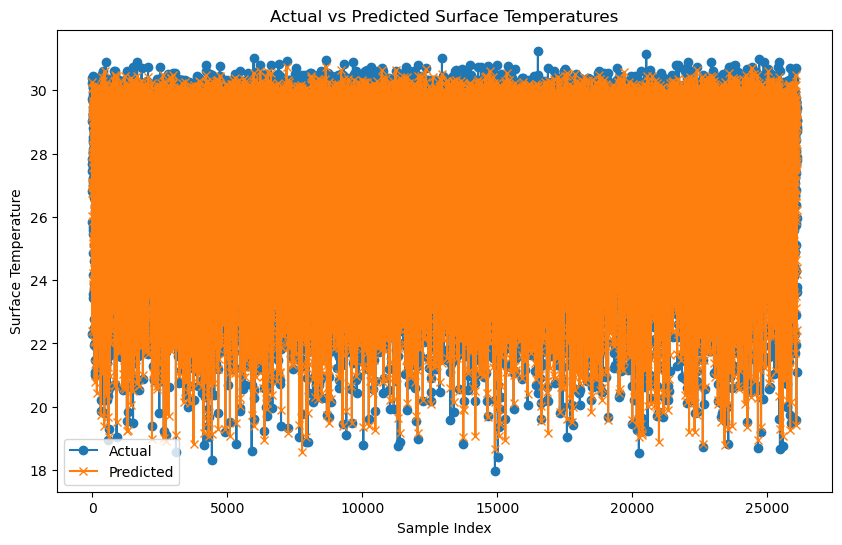

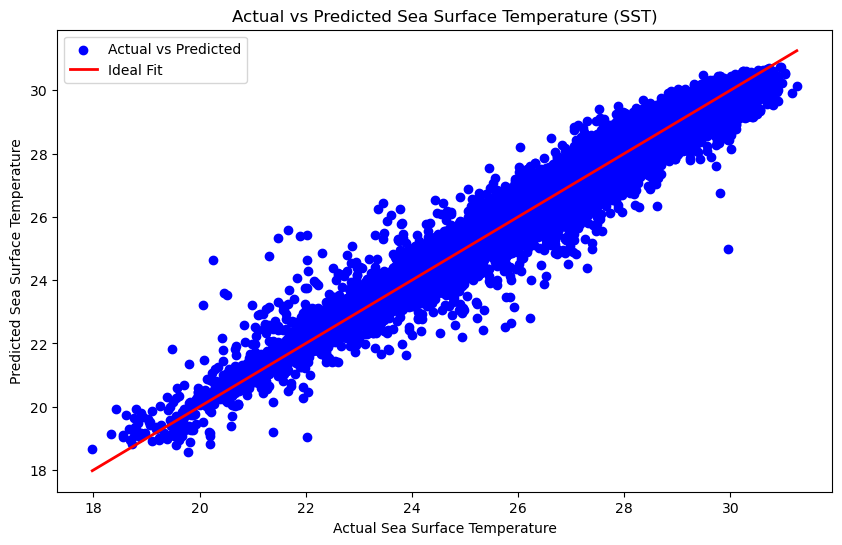

In [11]:
# Train-test split
tss=TimeSeriesSplit(n_splits=3)
for train,test in tss.split(X):
    X_train,X_test=X.iloc[train,:],X.iloc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predicting test results
y_pred = xgb_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(mean_absolute_error(y_test,y_pred))
# Model score (R²)
model_score = xgb_model.score(X_test, y_test)
print(f"Model Score (R²): {model_score}")

# Results dataframe
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

# Predicting surface temperature for sample data
sample_data = [[-4.99, 156, 4.8, -2.8, 78.5, 28.98]]  
scaled_sample_data = scaler.transform(sample_data)
predicted_temp = xgb_model.predict(scaled_sample_data)
print(f"Predicted Surface Temperature: {predicted_temp[0]}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Surface Temperatures')
plt.xlabel('Sample Index')
plt.ylabel('Surface Temperature')
plt.legend()
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel('Actual Sea Surface Temperature')
plt.ylabel('Predicted Sea Surface Temperature')
plt.title('Actual vs Predicted Sea Surface Temperature (SST)')
plt.legend()
plt.show()